# Logistic Regression Example

This notebook uses a sampling of data taken from the Buzzfeed news Github repository on the analysis of surveillance planes found [here](https://github.com/BuzzFeedNews/2016-04-federal-surveillance-planes) and arbitrarily assigned classes.

In [1]:
#get the packages we need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
#read in data
data = pd.read_csv('../demo-notebooks-data/simple_example_classes.csv')

In [3]:
#look at a few rows of data
data.sample(5)

,speed,altitude,class
75,96,7550,surveillance
32,71,7350,other
14,61,7874,other
83,109,8200,surveillance
17,63,4550,other


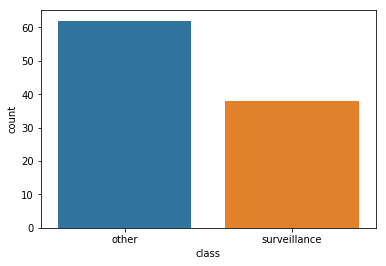

In [4]:
#look at breakdown of classes
sns.countplot(x='class', data=data);

In [5]:
#create the X and y data from our dataset
X = data[['speed', 'altitude']]
y = data['class']

In [6]:
#split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
#create and fit logistic regression model
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [8]:
#make predictions on the test data
predictions = logmodel.predict(X_test)

In [9]:
#create a data frame that compares the real values to the predicted values
comparison = pd.DataFrame({'real_class':y_test, 'predicted_class': predictions})
comparison

,real_class,predicted_class
83,surveillance,surveillance
53,surveillance,other
70,other,other
45,other,other
44,other,other
39,other,other
22,other,other
80,surveillance,surveillance
10,other,other
0,other,other


In [10]:
#print accuracy score for the test set
logmodel.score(X_test, y_test)

0.9